In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

# Read Dataset

In [3]:
A = pd.read_csv(r"C:\Users\hp\Downloads\TWTR.csv")

In [4]:
A.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


# Data Profile

In [5]:
A.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
A.shape

(2264, 7)

In [7]:
A.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,36.020286,36.699881,35.339465,36.003625,36.003625,2.175186e+07
std,14.118463,14.372057,13.828724,14.089989,14.089989,1.909988e+07
min,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00
25%,25.550000,26.215001,24.912501,25.410000,25.410000,1.233530e+07
50%,35.419998,36.099998,34.820000,35.490002,35.490002,1.691305e+07
75%,44.205000,45.015000,43.327501,44.135000,44.135000,2.428082e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.692131e+08


In [8]:
A.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998860,0.998588,0.997414,0.997414,-0.015718
High,0.998860,1.000000,0.998265,0.998731,0.998731,-0.001709
Low,0.998588,0.998265,1.000000,0.998887,0.998887,-0.031352
Close,0.997414,0.998731,0.998887,1.000000,1.000000,-0.019179
Adj Close,0.997414,0.998731,0.998887,1.000000,1.000000,-0.019179
Volume,-0.015718,-0.001709,-0.031352,-0.019179,-0.019179,1.000000


# Missing Data 

In [9]:
A.isna().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [10]:
for i in A.columns:
    if A[i].dtypes == 'object':
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x)
    else:
        x = A[i].mean()
        A[i] = A[i].fillna(x)

In [11]:
A.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
A.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2264.0,3.602029e+01,1.410286e+01,13.950,2.557500e+01,3.545000e+01,4.420000e+01,7.836000e+01
High,2264.0,3.669988e+01,1.435617e+01,14.220,2.624500e+01,3.613380e+01,4.500000e+01,8.075000e+01
Low,2264.0,3.533946e+01,1.381344e+01,13.725,2.492625e+01,3.485000e+01,4.331375e+01,7.605000e+01
Close,2264.0,3.600363e+01,1.407441e+01,14.010,2.549250e+01,3.553000e+01,4.408500e+01,7.763000e+01
Adj Close,2264.0,3.600363e+01,1.407441e+01,14.010,2.549250e+01,3.553000e+01,4.408500e+01,7.763000e+01
Volume,2264.0,2.175186e+07,1.907877e+07,0.000,1.235467e+07,1.697204e+07,2.424488e+07,2.692131e+08


In [14]:
A.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
A['Date'].dtypes

dtype('O')

In [26]:
A_2014 = A[A['Date'].str.startswith('2014')]
# find the lowest and highest price in 2014

A_low_2014 = A_2014['Low'].min()
A_High_2014 = A_2014['High'].max()

print('Lowest Price in 2014: $',A_low_2014)
print('Highest Price in 2014: $',A_High_2014)

Lowest Price in 2014: $ 29.51
Highest Price in 2014: $ 70.43


# Data visualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

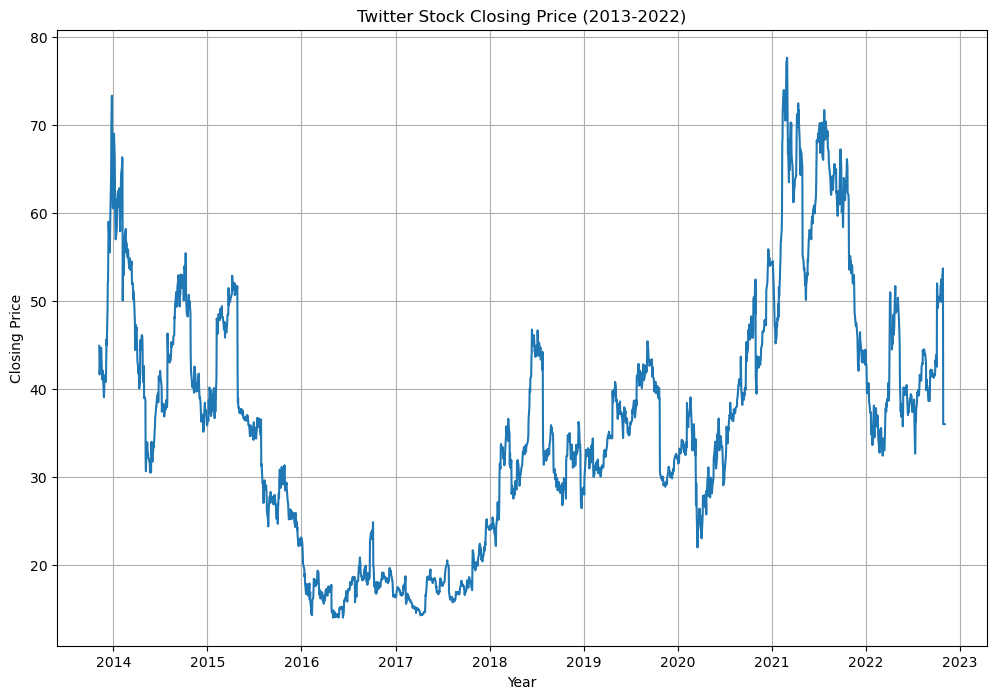

In [39]:
# convert date column into datetime format

A['Date'] = pd.to_datetime(A['Date'])

# Ploting closing price over time
plt.figure(figsize=(12,8))
plt.plot(A['Date'],A['Close'])
plt.title('Twitter Stock Closing Price (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)

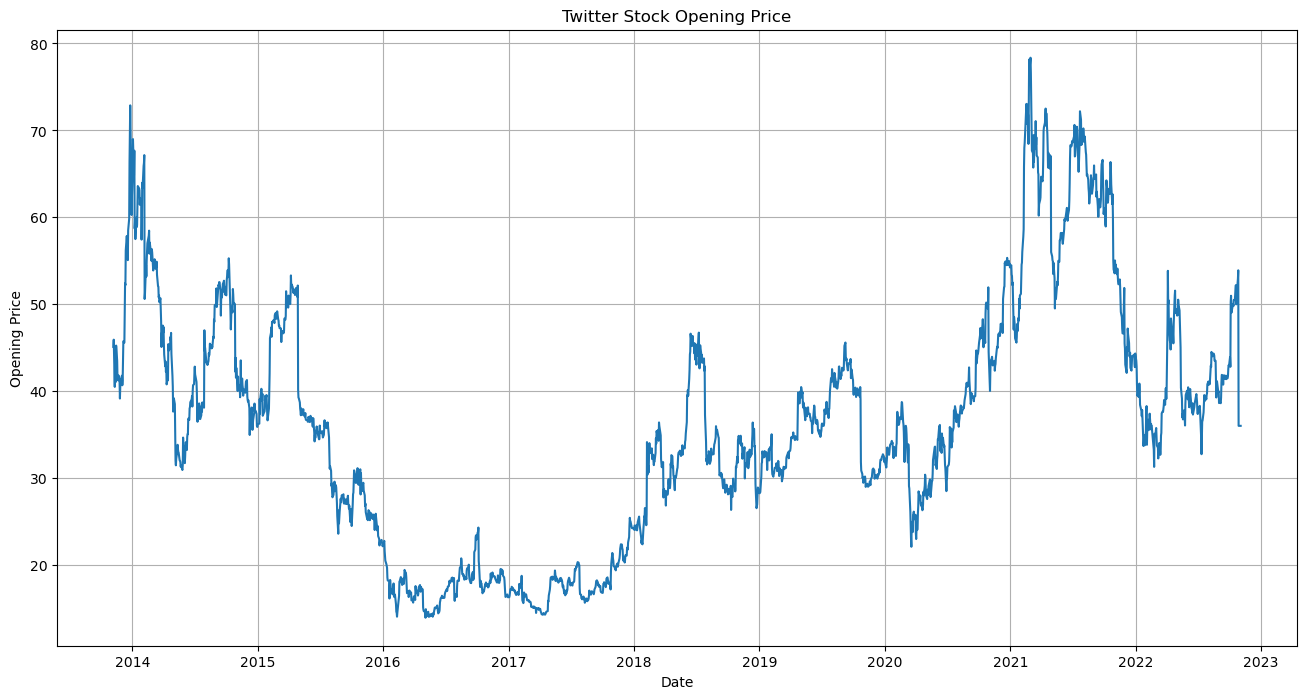

In [45]:
# Ploting opening price over time

plt.figure(figsize=(16,8))
plt.plot(A['Date'],A['Open'])
plt.title('Twitter Stock Opening Price')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.grid(True)

In [46]:
A.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

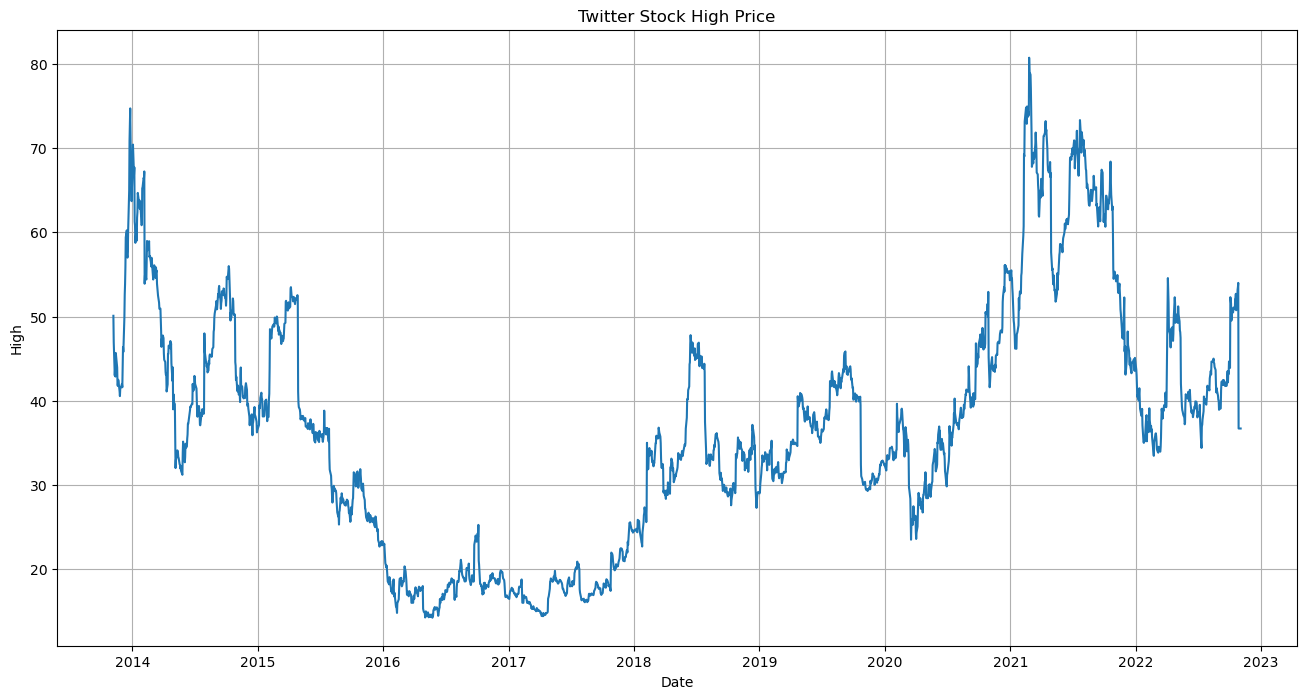

In [54]:
plt.figure(figsize=(16,8))

plt.plot(A['Date'],A['High'])
plt.title('Twitter Stock High Price')
plt.xlabel("Date")
plt.ylabel('High')
plt.grid(True)

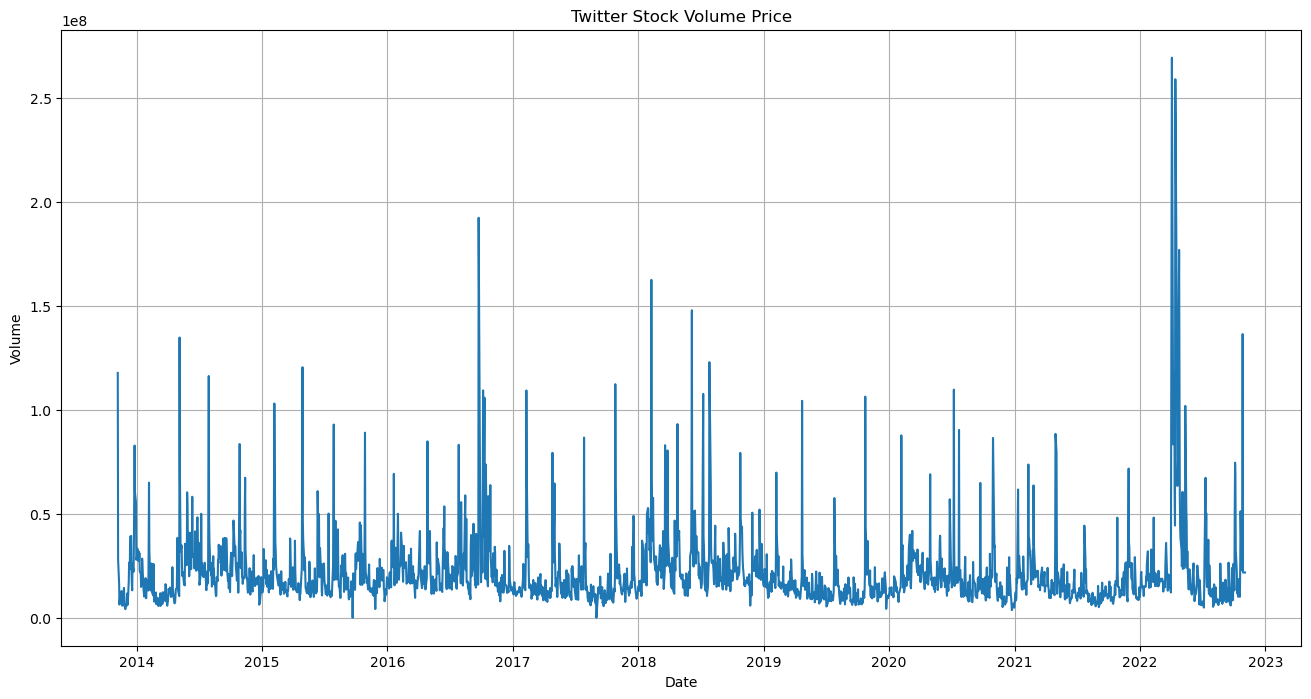

In [58]:
plt.figure(figsize=(16,8))

sns.lineplot(A['Date'],A['Volume'])
plt.title('Twitter Stock Volume Price')
plt.xlabel("Date")
plt.ylabel('Volume')
plt.grid(True)

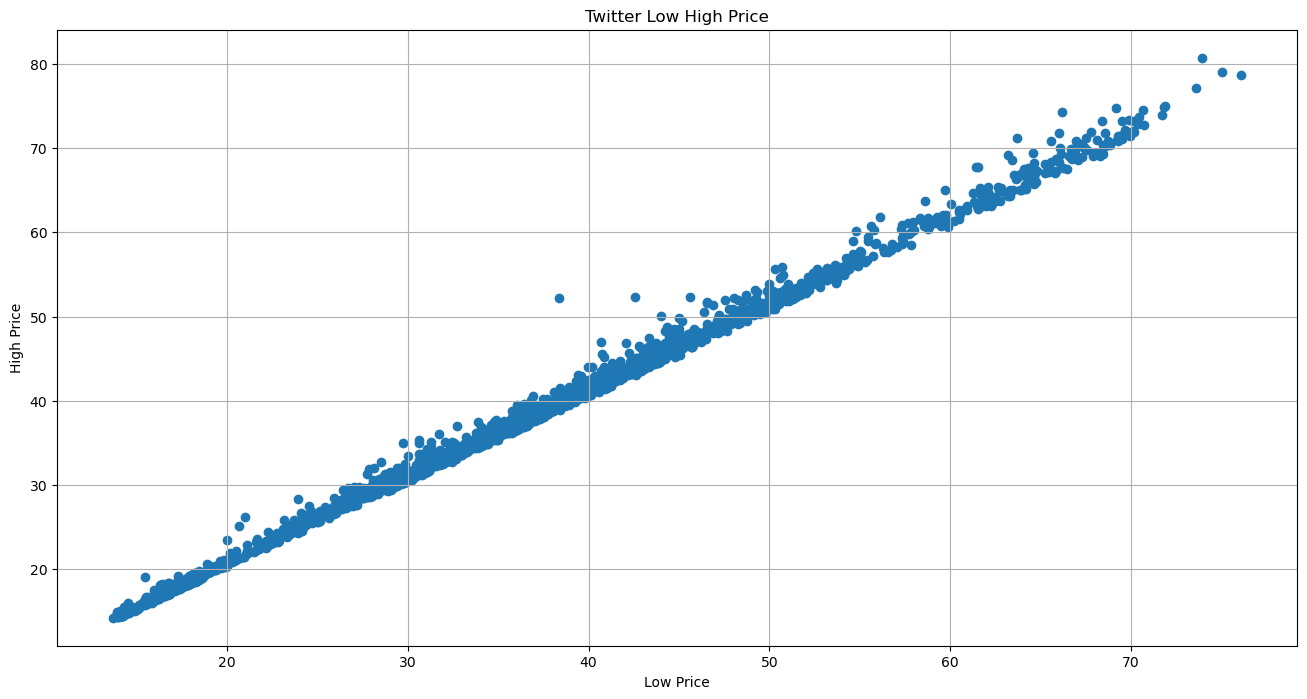

In [61]:
plt.figure(figsize=(16,8))
plt.scatter(A['Low'],A['High'])
plt.title('Twitter Low High Price')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.grid(True)

In [63]:
cat = []
con = []
for i in A.columns:
    if A[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)

In [64]:
con

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [65]:
con.remove('Date')

In [66]:
con

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']